## 1. Loading the dataset

In [0]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [4]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [0]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [5]:
# looking at the shape of the data
data.shape

(614, 12)

In [0]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [7]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [0]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],
                                                 random_state=10,test_size=0.2)

In [9]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [10]:
import keras
from keras import Input, Model
from keras.models import Sequential
from keras.layers import InputLayer, Dense, concatenate

Using TensorFlow backend.


In [11]:
# number of input neurons
X_train.shape

(491, 11)

In [12]:
# number of features in the data
X_train.shape[1]

11

In [0]:
# defining input neurons
input_neurons = X_train.shape[1]

# define number of output neurons
output_neurons = 1

In [0]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1_1 = 10
neuron_hidden_layer_1_2 = 20
neuron_hidden_layer_2 = 5

In [15]:
# defining the architecture of the model using Functional API
x = Input(shape = (input_neurons,))
hidden1_1 = Dense(units=neuron_hidden_layer_1_1, activation='relu')(x)
hidden1_2 = Dense(units=neuron_hidden_layer_1_2, activation='relu')(x)

combined = concatenate([hidden1_1, hidden1_2])

hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(combined)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output) 

In [16]:
# summary of the model
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 11)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           120         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           240         input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 30)           0           dense_1[0][0]                    
                                                                 dense_2[0][0]              

## 4. Compiling the model (defining loss function, optimizer)

In [17]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model_functional.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 5. Training the model

In [18]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)




Train on 491 samples, validate on 123 samples
Epoch 1/50





491/491 [==============================] - 1s 2ms/step - loss: 0.6440 - acc: 0.6864 - val_loss: 0.6281 - val_acc: 0.6911
Epoch 2/50
491/491 [==============================] - 0s 63us/step - loss: 0.6102 - acc: 0.6864 - val_loss: 0.6063 - val_acc: 0.6911
Epoch 3/50
491/491 [==============================] - 0s 57us/step - loss: 0.5985 - acc: 0.6864 - val_loss: 0.6001 - val_acc: 0.6911
Epoch 4/50
491/491 [==============================] - 0s 52us/step - loss: 0.5906 - acc: 0.6864 - val_loss: 0.5951 - val_acc: 0.6911
Epoch 5/50
491/491 [==============================] - 0s 54us/step - loss: 0.5840 - acc: 0.6864 - val_loss: 0.5896 - val_acc: 0.6911
Epoch 6/50
491/491 [==============================] - 0s 57us/step - loss: 0.5778 - acc: 0.6864 - val_loss: 0.5838 - val_acc: 0.6911
Epoch 7/50
491/491 [==============================] - 0s 65us/step - loss: 0.5710 - acc: 0.6864 - val_loss: 0.5778 - val_acc: 0.6911
Epoch 8/50
491/4

## 6. Evaluating model performance on validation set

In [0]:
# getting predictions for the validation set
prediction = model_functional.predict(X_test)

In [0]:
prediction = prediction.reshape(123,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

In [21]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction_int)

0.8130081300813008

### Visualizing the model performance

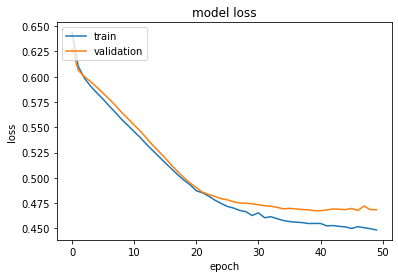

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

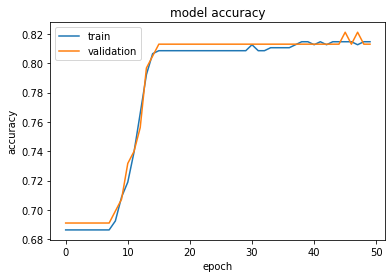

In [23]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()